In [3]:
# 붓꽃의 품종을 머신러닝을 이용하여 꽃잎과 꽃받침의 크기를 기반으로 분류
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import font_manager,rc

font_name=font_manager.FontProperties(fname="c:/windows/fonts/malgun.ttf").get_name() # 한글 처리
rc('font',family=font_name)

In [4]:
df=pd.read_csv('d:/data/iris/iris.csv')
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [5]:
print(df.columns)
print(df.shape)
print(df['Name'].unique())
df.describe()

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name',
       'Species'],
      dtype='object')
(150, 6)
['setosa' 'versicolor' 'virginica']


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
# 품종을 기준으로 한 평균값들
df.groupby('Name').mean()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
Name,,,,,
setosa,5.006,3.418,1.464,0.244,0
versicolor,5.936,2.770,4.260,1.326,1
virginica,6.588,2.974,5.552,2.026,2


Text(0, 0.5, 'SepalWidth')

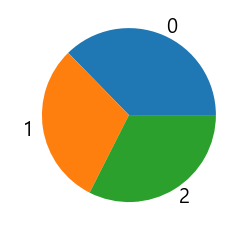

In [7]:
# 파이 차트
sums_by_species=df.groupby('Species').sum()
var='SepalWidth'
sums_by_species[var].plot(kind='pie', fontsize=20)
plt.ylabel(var, horizontalalignment='left', color='white')

         SepalLength  SepalWidth  PetalLength  PetalWidth
Species                                                  
0              250.3       170.9         73.2        12.2
1              296.8       138.5        213.0        66.3
2              329.4       148.7        277.6       101.3


<AxesSubplot:xlabel='Species'>

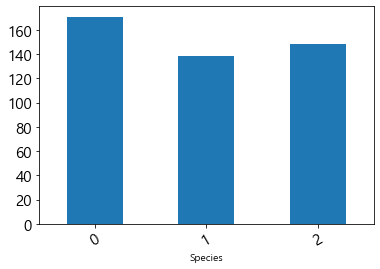

In [8]:
# 품종별 변수 합계
print(sums_by_species)
# 꽃받침 너비(Sepal Length) 기준 분류 그래프
sums_by_species[var].plot(kind='bar', fontsize=15, rot=30) # rot : 글자 회전각

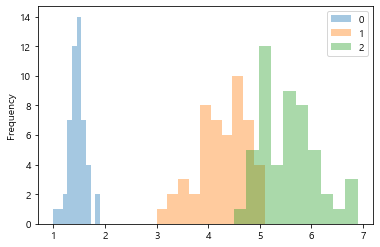

In [9]:
# 품종별 꽃잎 길이
for spec in df['Species'].unique():
    subdf=df[df['Species']==spec]
    subdf['PetalLength'].plot(kind='hist', alpha=0.4, label=spec)

plt.legend(loc='upper right')

In [10]:
df['Name'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: Name, dtype: int64

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: setosa, 1: versicolor, 2: viginica)')

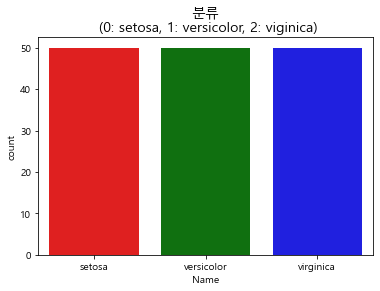

In [11]:
import seaborn as sns

colors=['red','green','blue']
sns.countplot('Name', data=df, palette=colors)
plt.title('분류\n (0: setosa, 1: versicolor, 2: viginica)', fontsize=14)

In [12]:
cols=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
X=df[cols]
y=df['Species']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)
model=LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [14]:
print('학습용 :',model.score(X_train, y_train))
print('검증용 :',model.score(X_test, y_test))

학습용 : 0.9666666666666667
검증용 : 1.0


In [15]:
from sklearn.metrics import confusion_matrix

pred=model.predict(X_test)
cm=confusion_matrix(y_test, pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [16]:
df_cm=pd.DataFrame(cm, index=[0,1,2], columns=[0,1,2])
df_cm

,0,1,2
0,11,0,0
1,0,13,0
2,0,0,6


<AxesSubplot:title={'center':'Confusion Matrix'}>

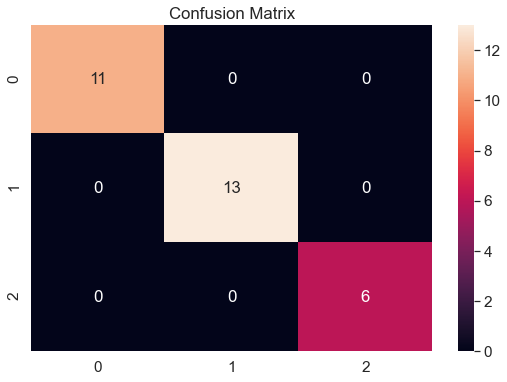

In [17]:
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title('Confusion Matrix')
sns.heatmap(df_cm, annot=True)

In [18]:
df.Species.unique()

array([0, 1, 2], dtype=int64)

In [23]:
flowers=['setosa','versicolor','virginica']
X_new=[[7,3.0,5,1.4]]
pred=model.predict(X_new)
print('품종 :',flowers[pred[0]],df.Species.unique()[pred[0]])

품종 : versicolor 1


In [20]:
import joblib
joblib.dump(model, 'd:/data/iris/iris_logit.model')

['d:/data/iris/iris_logit.model']